# Personal medical cost prediction

### Problem statement :

The datasheet contain 1300+ people's personal information 
including age , sex , BMI , children , smoking , region and 
medical charge . But we need to find the variavles that ase 
useful for our research

sex : Male / Female

BMI : Body mass index

smoker : Smoking or not smoking 

Region : place where the person belong 

charges : medical costs billed by health insurance

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (20, 10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print('SHAPE -',df.shape,'\n DESCRIBE-\n',df.describe(include='all'))

SHAPE - (1338, 7) 
 DESCRIBE-
                 age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  


### Checking for the null values

In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The data set has no null values

#### checking for the duplicates

In [5]:
print('NO of duplicates before',df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('No of duplicates after', df.duplicated().sum())

NO of duplicates before 1
No of duplicates after 0


#### Checking for the Outliers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

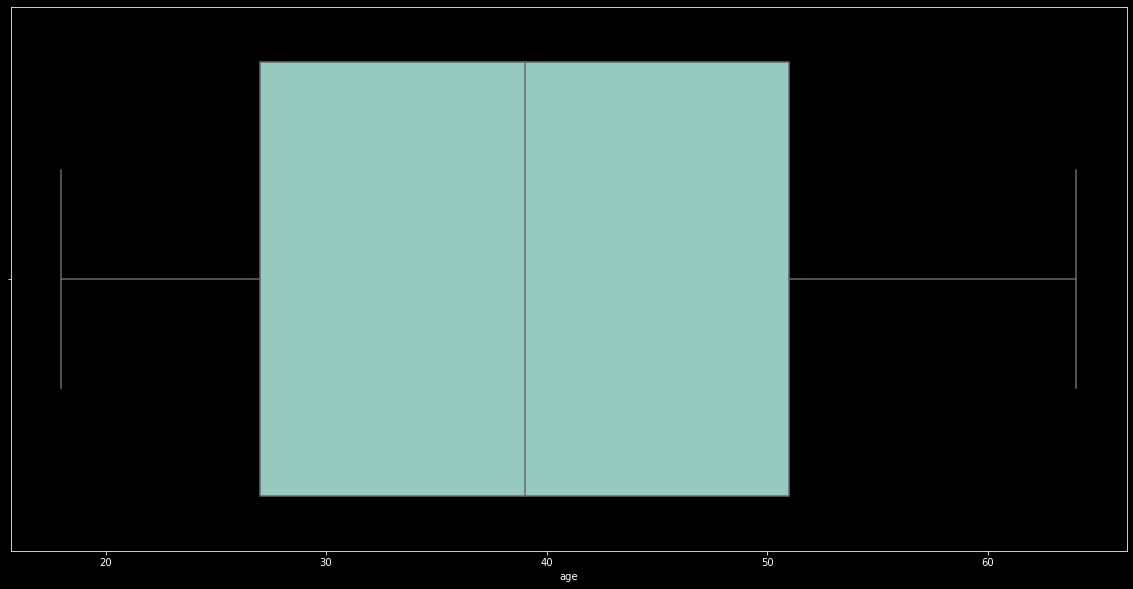

In [6]:
sns.boxplot(df['age'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

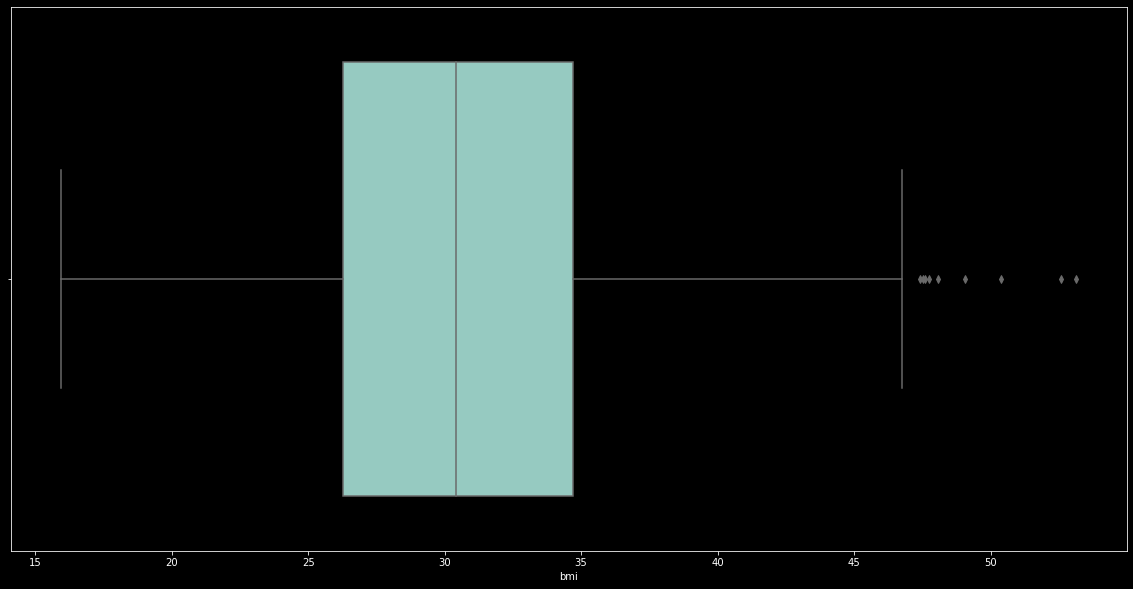

In [7]:
sns.boxplot(df['bmi'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

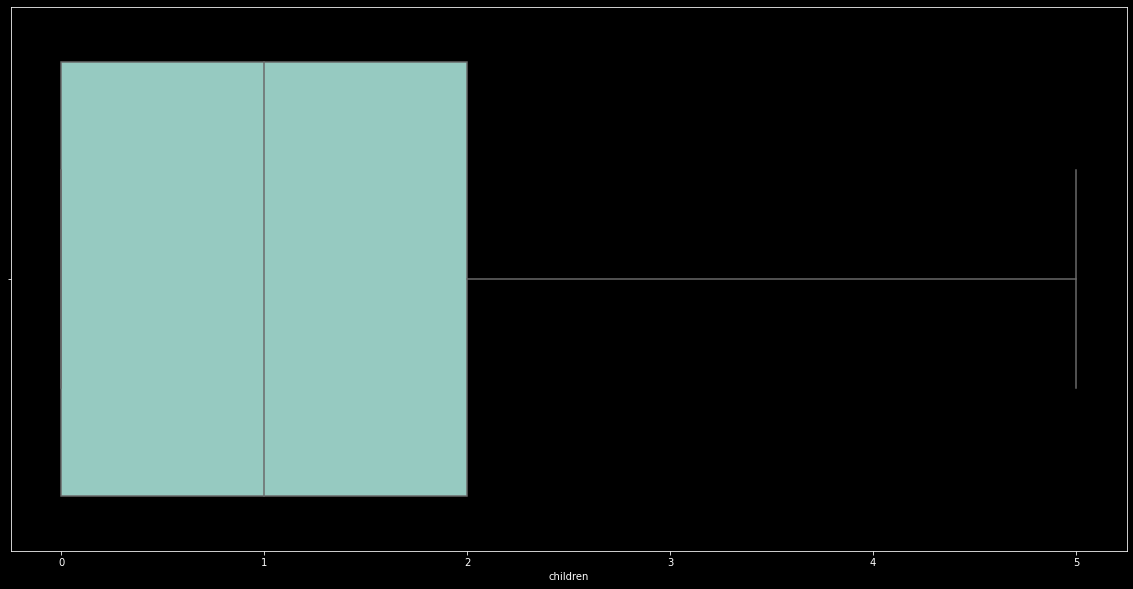

In [8]:
sns.boxplot(df['children'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

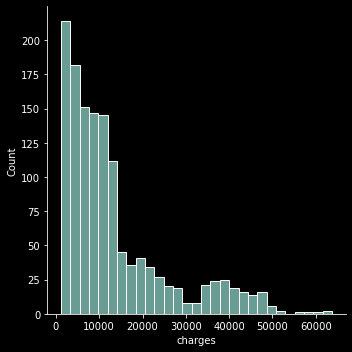

In [9]:
sns.displot(data=df, x='charges')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

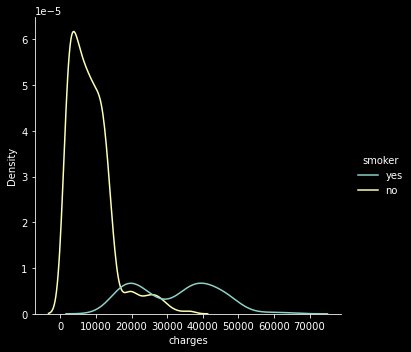

In [10]:
sns.displot(data=df,x='charges',hue='smoker',kind='kde')
plt.show()

From the above plots we can say that

non smoker pay less as compared to the smoker 



#### Univariate analysis

<IPython.core.display.Javascript object>

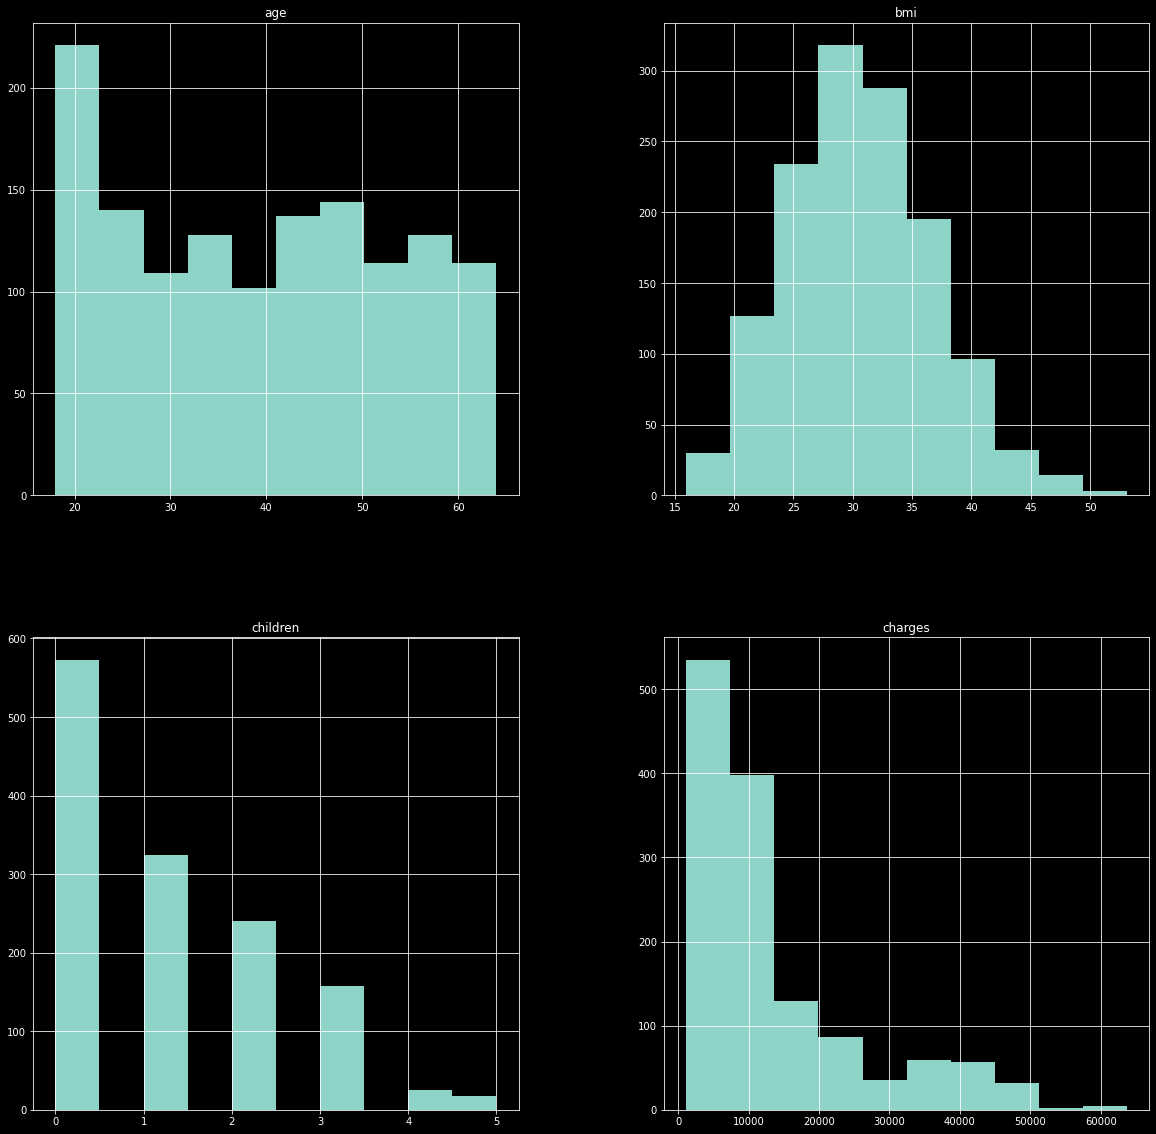

In [11]:
df.hist(figsize=(20,20))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

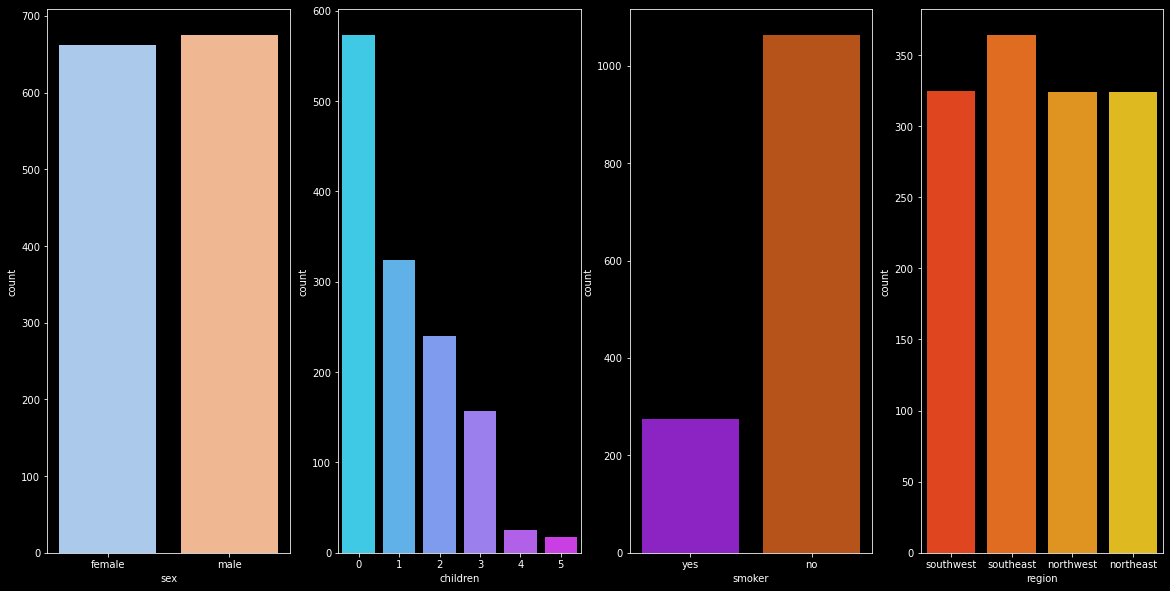

In [12]:
plt.subplot(1,4,1)
sns.countplot(df['sex'],palette='pastel')
plt.subplot(1,4,2)
sns.countplot(df['children'],palette='cool')
plt.subplot(1,4,3)
sns.countplot(df['smoker'],palette='gnuplot')
plt.subplot(1,4,4)
sns.countplot(df['region'],palette='autumn')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

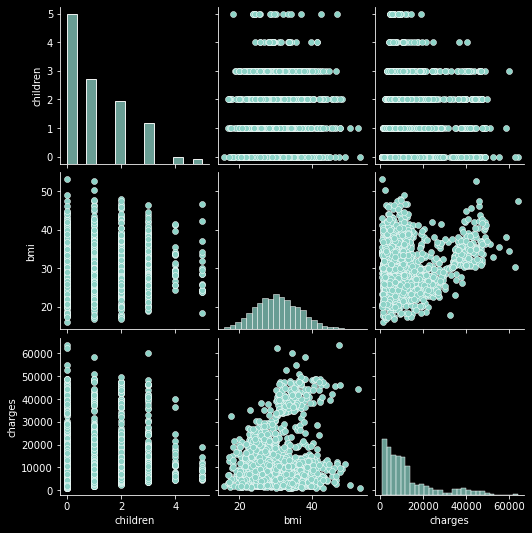

In [13]:
numeric_columns=['sex','children','bmi','charges']
sns.pairplot(df[numeric_columns])
plt.show()

#### Multivariate analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

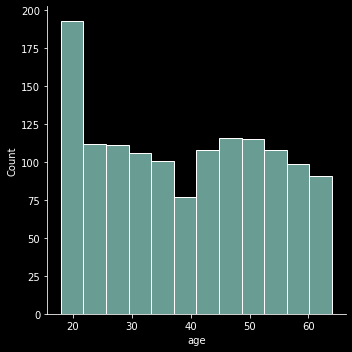

In [14]:
sns.displot(data=df, x='age')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

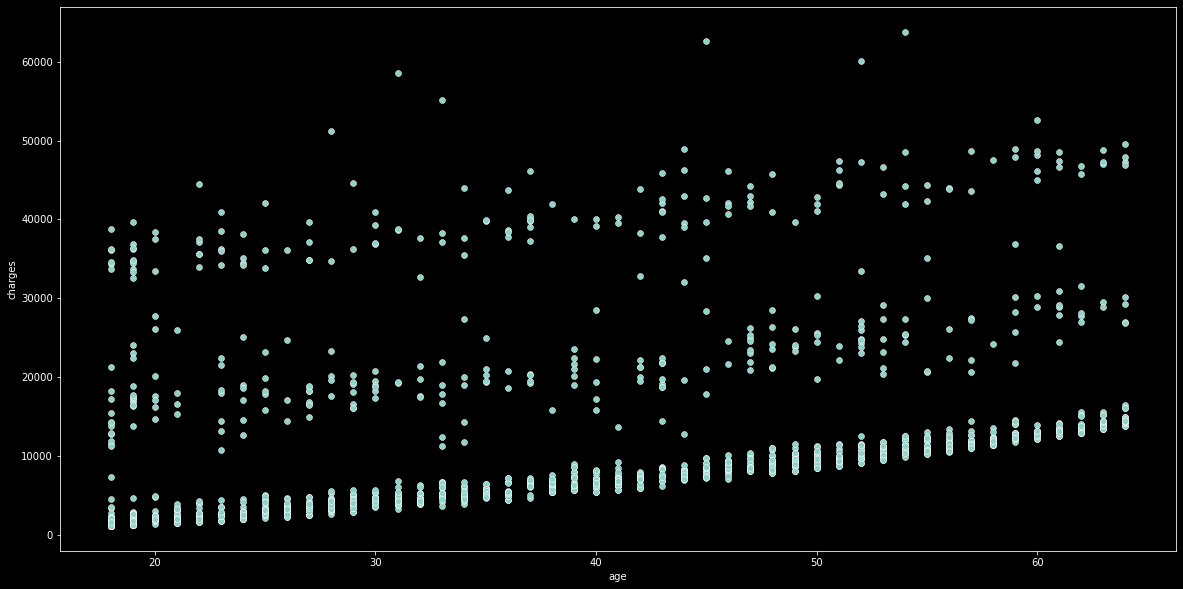

In [15]:
sns.scatterplot(data=df, x='age', y='charges')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

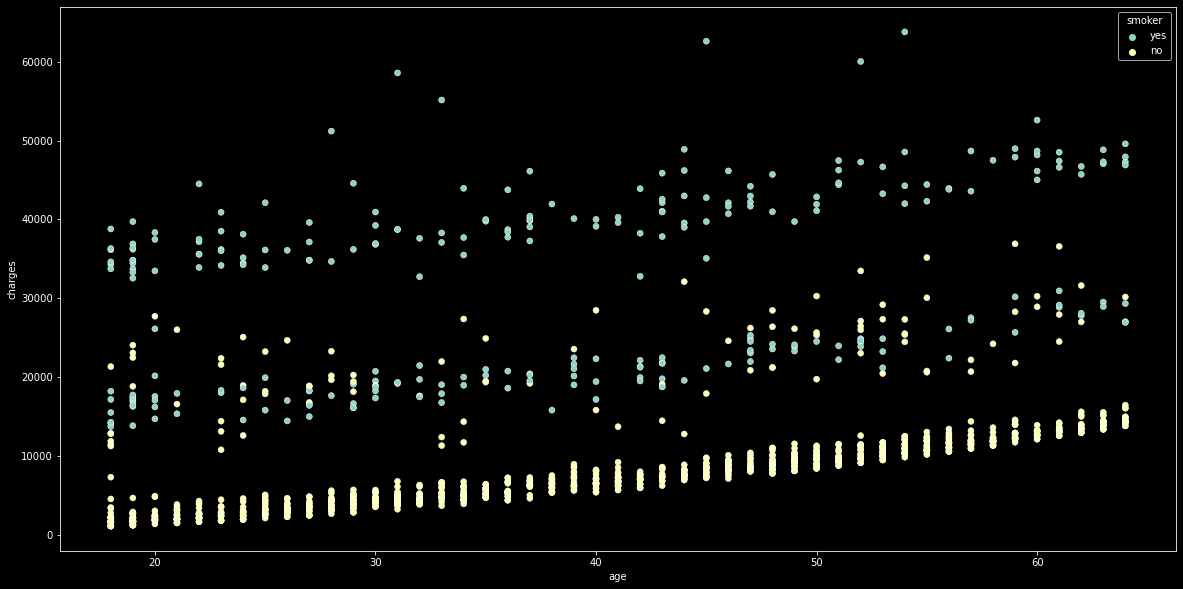

In [16]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.show()


From the above observation we can say that smoker has to pay more medical charges that the 
non smoker one

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

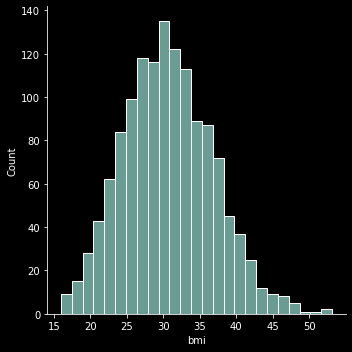

In [17]:
sns.displot(data=df, x='bmi')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

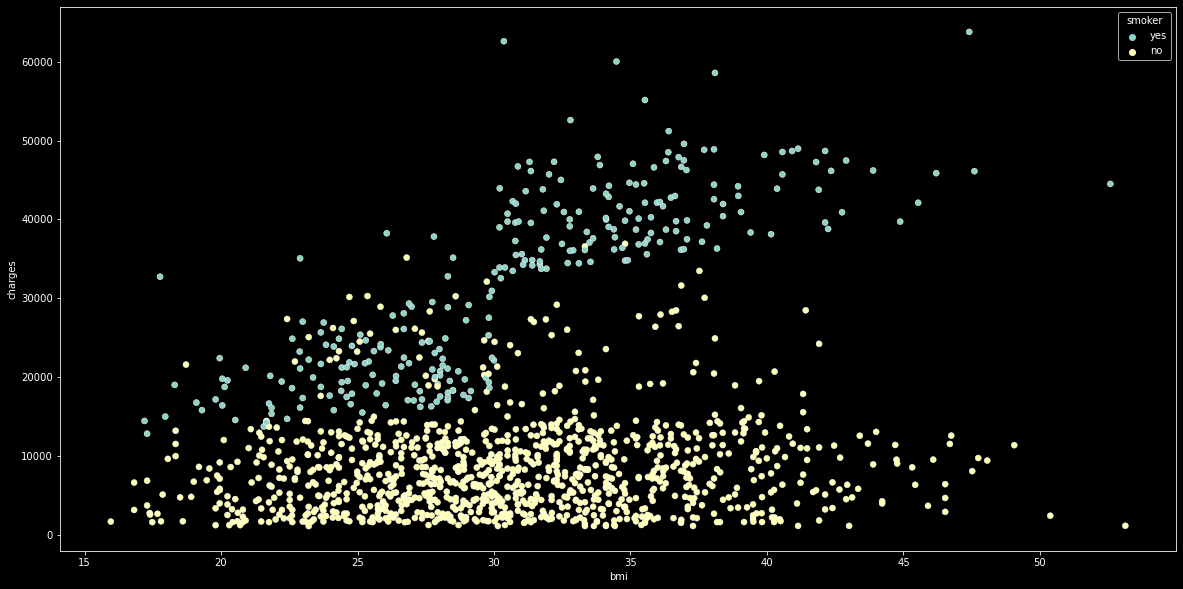

In [18]:
sns.scatterplot(data=df, x='bmi', y='charges',hue='smoker')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

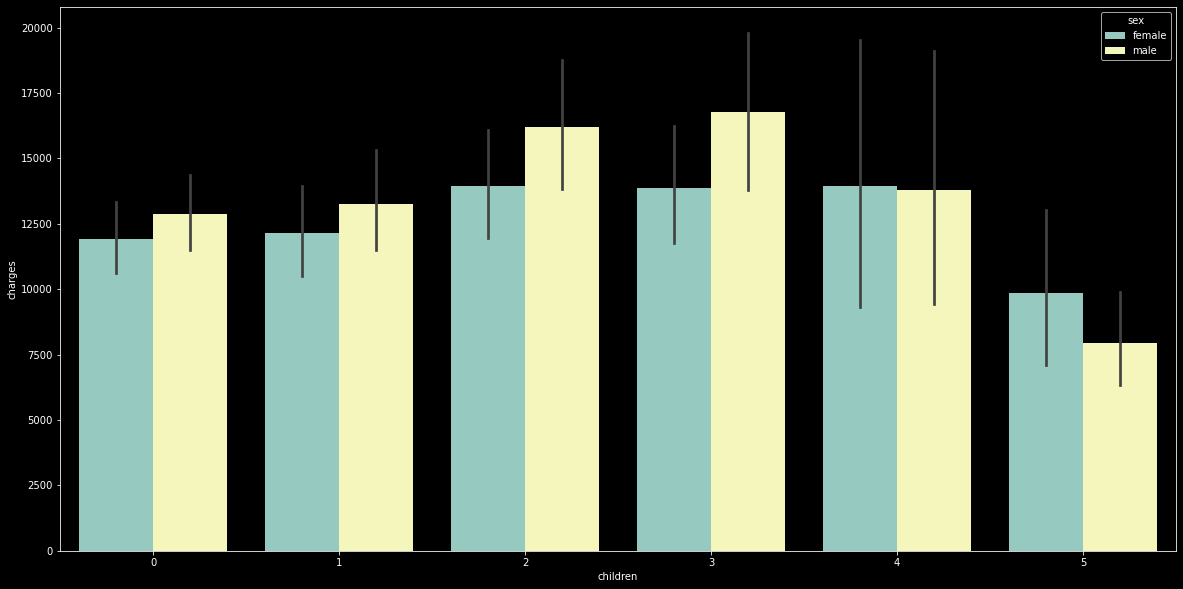

In [19]:
sns.barplot(x='children',y='charges',hue='sex',data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

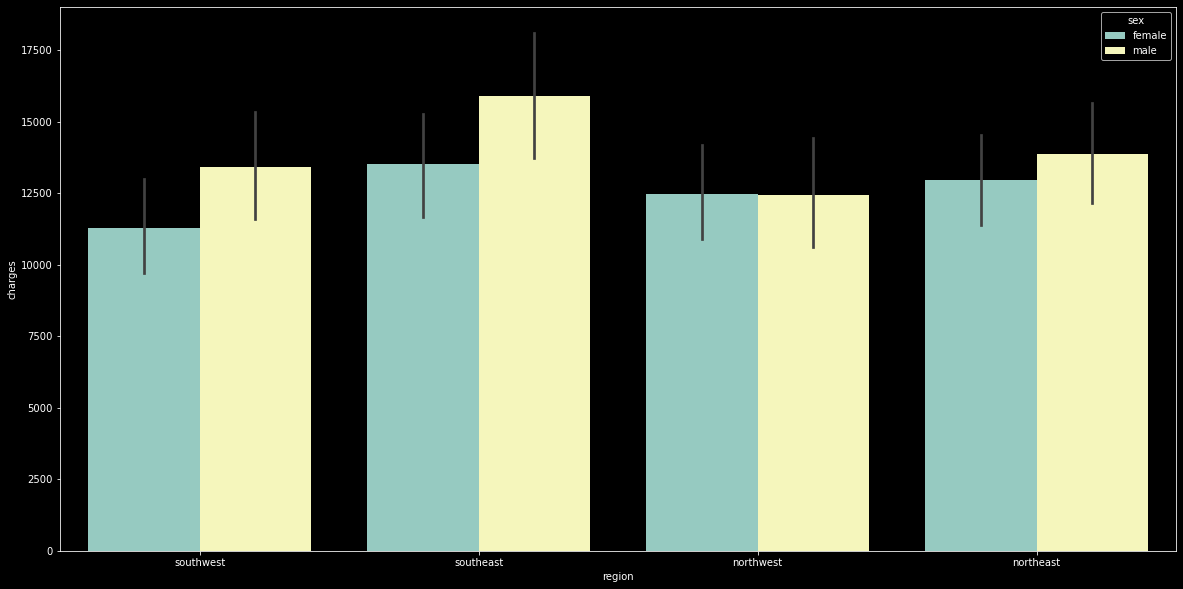

In [20]:
sns.barplot(x='region',y='charges',hue='sex',data=df)
plt.show()

#### Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

In [23]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### Heatmap

<IPython.core.display.Javascript object>

<AxesSubplot:>

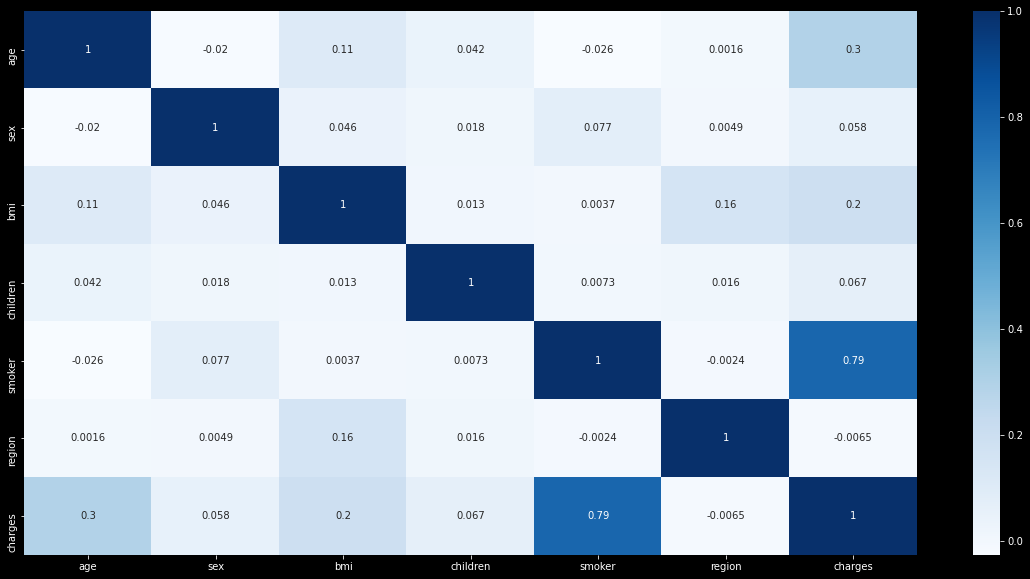

In [24]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

When we look at the correlatin of the variables, it is seen that the linear correlation
with the smoker variable is quite high and the sex variable is quite low that's why er are 
going to drop this feature from the data for the model

In [25]:
x=df.drop(columns=['charges','sex'])
y=df['charges']

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)


In [27]:
from sklearn.metrics import mean_squared_error

Accoring to the results we obtained our model works best with XGBoost .

Then let's move to the model tuning

### Models

In [39]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


In [40]:
results={'model': [], 'r2_score': [], 'Rmse': []}

In [41]:
models=[LinearRegression(), Lasso(), Ridge(), ElasticNet(), KNeighborsRegressor(), 
        DecisionTreeRegressor()]



In [43]:
for model in models:
    m=model
    m.fit(xtrain, ytrain)
    Y_test_pred=m.predict(xtest)
    rmse=np.sqrt(mean_squared_error(ytest, Y_test_pred))
    r2=r2_score(ytest, Y_test_pred)
    results['model'].append(type(model).__name__)
    results['r2_score'].append(r2)
    results['Rmse'].append(rmse)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
results_frame=pd.DataFrame(results)
results_frame.sort_values('r2_score', ascending=False)

,model,r2_score,Rmse
1,Lasso,0.762253,5763.388223
0,LinearRegression,0.762252,5763.401980
2,Ridge,0.762107,5765.152305
5,DecisionTreeRegressor,0.752403,5881.558107
3,ElasticNet,0.378083,9321.511063
4,KNeighborsRegressor,0.101519,11204.035974


### Model tunnig

In [46]:
ridge_params={'alpha': [0.1, 0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1], 
                   'solver': ['auto', 'svd', 'cholesky']}
lasso_params={'alpha': [0.1, 0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1]}

In [47]:
def tuning(x, y, model, model_params):
    results=[]
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    clf=GridSearchCV(model, model_params, cv=5, return_train_score=True)
    clf.fit(X_train, Y_train)
    Y_test_pred=clf.predict(X_test)
    test_error=np.sqrt(mean_squared_error(Y_test, Y_test_pred))
    r2score=r2_score(Y_test, Y_test_pred)                                                  
    print(type(model).__name__)
    print('Rmse: {}'.format(test_error))
    print('r2_score: {}'.format(r2score))
    results.append({'model': type(model).__name__, 
                    'RMSE': test_error,
                    'R2 Score': r2score,
                    'best_score': clf.best_score_,
                    'best_params': clf.best_params_})
    return results

In [49]:
result1=tuning(x, y, Ridge(), ridge_params)

<IPython.core.display.Javascript object>

Ridge
Rmse: 5947.690383827399
r2_score: 0.79541345898493


In [51]:
result2=tuning(x, y, Lasso(), lasso_params)

<IPython.core.display.Javascript object>

Lasso
Rmse: 5936.376312311174
r2_score: 0.7961910734929241
